<a href="https://colab.research.google.com/github/VsevolodLazebnyi/cs102/blob/homework06/homework06/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23_ipynb%22_%D1%87%D0%B0%D1%81%D1%82%D1%8C_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
import pandas as pd

df = pd.read_csv('music_genre.csv')
df = df.sample(20000)
df = df.drop_duplicates()
empty_artist_name = df.loc[df['artist_name'] == 'empty_field']
print(empty_artist_name, len(empty_artist_name))
df = df.loc[df['artist_name'] != 'empty_field']

       instance_id  artist_name  \
35543      41719.0  empty_field   
8453       78584.0  empty_field   
3676       39957.0  empty_field   
2550       67265.0  empty_field   
32868      52036.0  empty_field   
...            ...          ...   
11191      47301.0  empty_field   
45919      62270.0  empty_field   
27110      24611.0  empty_field   
11035      81671.0  empty_field   
26747      59950.0  empty_field   

                                              track_name  popularity  \
35543                                 Talk You Out Of It        75.0   
8453                                  For Those We Loved        18.0   
3676                                                Glue        63.0   
2550                                        Nothing Owed        45.0   
32868                                    Parachute Heart        23.0   
...                                                  ...         ...   
11191  Whatever Will Be, Will Be (Que Sera, Sera) - S...        46.0   
459

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Electronic     0.103055
Blues          0.103055
Anime          0.100741
Classical      0.100741
Hip-Hop        0.100058
Rock           0.099953
Jazz           0.098533
Rap            0.098323
Country        0.098007
Alternative    0.097481
Name: music_genre, dtype: float64 



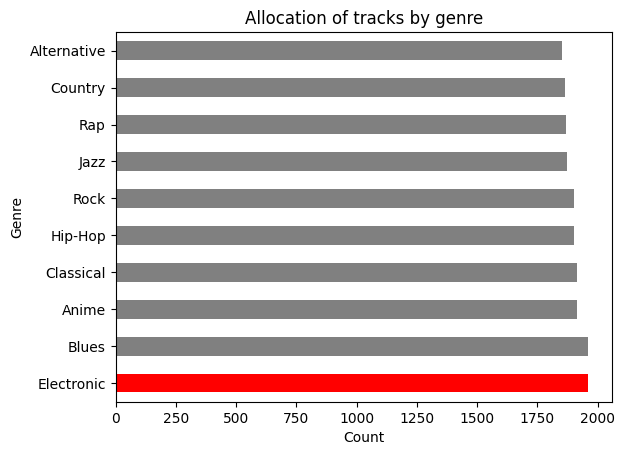



The most danceable genre is Hip-Hop

music_genre
Alternative    Major
Anime          Major
Blues          Major
Classical      Major
Country        Major
Electronic     Major
Hip-Hop        Major
Jazz           Major
Rap            Major
Rock           Major
dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Пункт 1
genre_count = df['music_genre'].value_counts()
genre_ratios = genre_count / len(df)
print(genre_ratios, '\n')

# Пункт 2
max_genre = genre_count.index[0]
ax = genre_count.plot(kind = 'barh', color = ['grey'] * len(genre_count))
ax.set(title = 'Allocation of tracks by genre', xlabel = 'Count', ylabel = 'Genre')
ax.patches[genre_count.index.get_loc(max_genre)].set_facecolor('red')
plt.show()
print('\n')

# Пункт 3
danceability_means = df.groupby('music_genre')['danceability'].mean()
most_danceable_genre = danceability_means.idxmax()
print('The most danceable genre is', most_danceable_genre + '\n')

# Пункт 4
tonality_count = df.groupby(['music_genre', 'mode'])['mode'].count().unstack(fill_value = 0)
most_tonality = tonality_count.idxmax(axis=1)
print(most_tonality)

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

The artist with the most tracks: Nobuo Uematsu
The artist with the fewest tracks: (Hed) P.E.



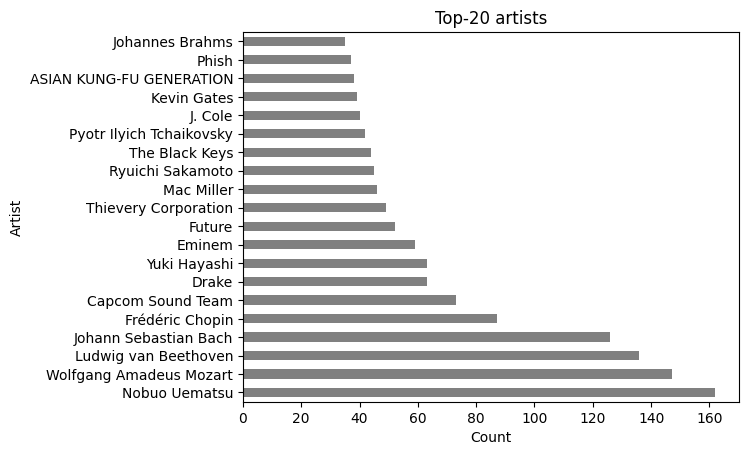



Artist Nobuo Uematsu has the most tracks in this bar
Artist (Hed) P.E. has the fewest tracks in this bar


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Пункт 1
most_tracks = df.groupby('artist_name').count()['track_name'].idxmax()
least_tracks = df.groupby('artist_name').count()['track_name'].idxmin()
print('The artist with the most tracks:', most_tracks)
print('The artist with the fewest tracks:', least_tracks + '\n')

# Пункт 2
tracks = df['artist_name'].value_counts()
top_artists = tracks[:20]
ax = top_artists.plot(kind = 'barh', color = ['grey'] * len(top_artists))
ax.set(title = 'Top-20 artists', xlabel = 'Count', ylabel = 'Artist')
plt.show()
print('\n')
print('Artist', most_tracks, 'has the most tracks in this bar')
print('Artist', least_tracks, 'has the fewest tracks in this bar')

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

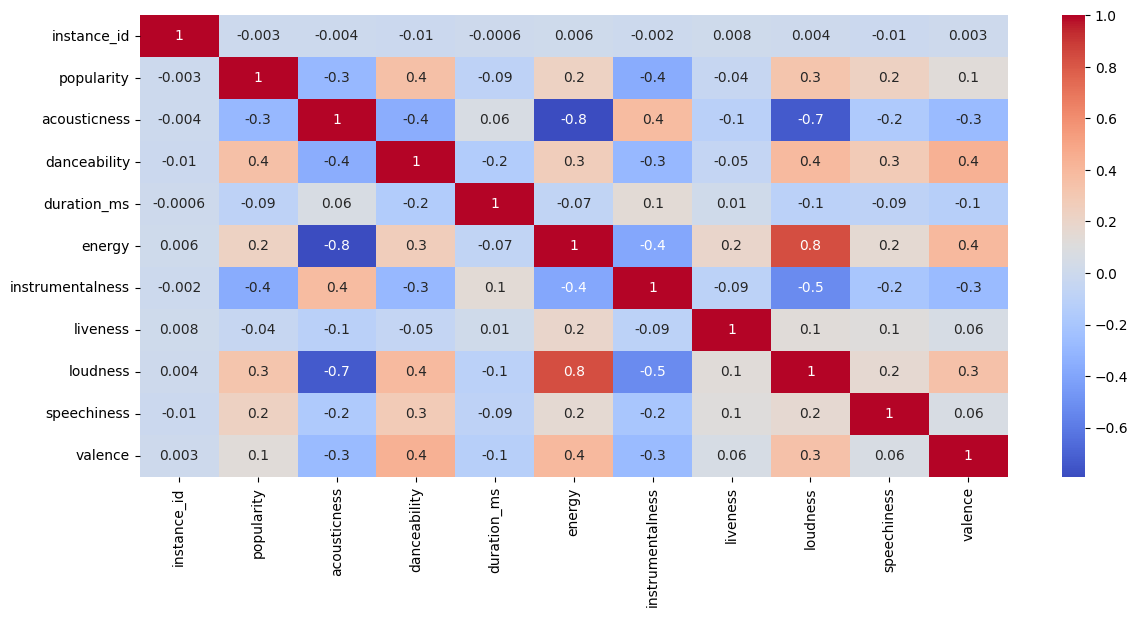



The correlation between the name of the track and the popularity is: -0.22903265292721467


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm', ax=ax)
fig.set_figwidth(14)
fig.set_figheight(6)
plt.show()

correlation = df['popularity'].corr(df['track_name'].str.len())
print('\n')
print('The correlation between the name of the track and the popularity is:', correlation)

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

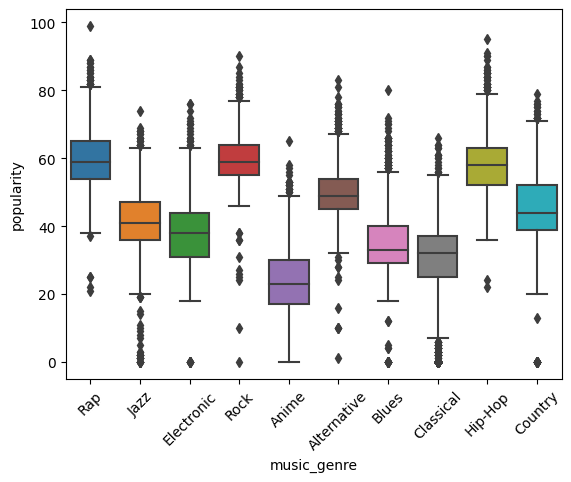



Как пример, между собой похожи хип-хоп, рэп и рок, но нижняя граница хип-хопа несколько ниже. Однако медианные значения очень похожи.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='music_genre', y='popularity', data=df)
plt.xticks(rotation=45)
plt.show()
print('\n')

print('Как пример, между собой похожи хип-хоп, рэп и рок, но нижняя граница хип-хопа несколько ниже. Однако медианные значения очень похожи.')

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

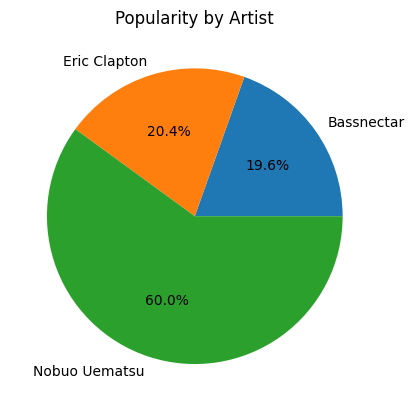

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_genres = df['music_genre'].value_counts().head(3).index.tolist()

top_artists = []
for genre in top_genres:
    subdf = df[df['music_genre'] == genre]
    top_artist = subdf.groupby('artist_name')['popularity'].sum().nlargest(1).index[0]
    top_artists.append(top_artist)
  
subdf = df[(df['music_genre'].isin(top_genres)) & (df['artist_name'].isin(top_artists))]
popularity_by_artist = subdf.groupby('artist_name')['popularity'].sum()
fig, ax = plt.subplots()
ax.pie(popularity_by_artist, labels=popularity_by_artist.index, autopct='%1.1f%%')
ax.set_title('Popularity by Artist')
plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

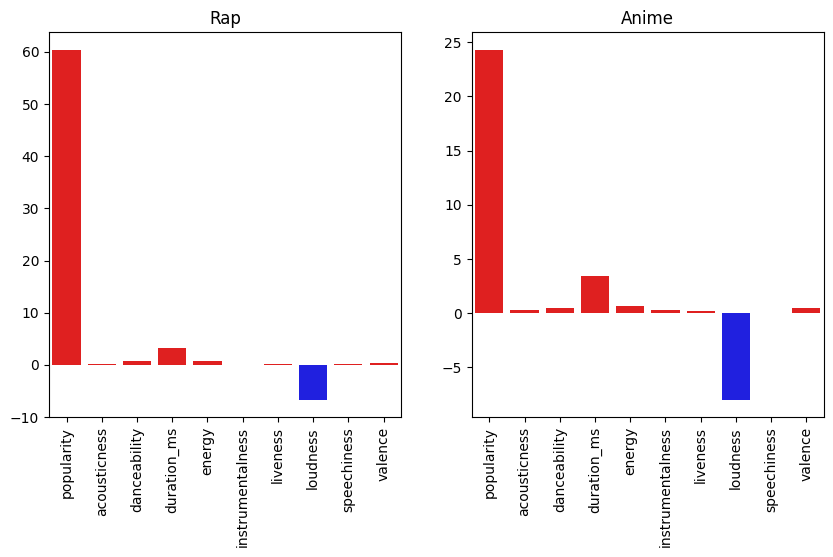

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new = df.drop('instance_id', axis=1) # Тут надо создать новый df для того, чтобы можно было спокойно удалять строчки и прочие приколы без боязни навредить другим программам
df_new.loc[:, 'duration_ms'] = df['duration_ms'] / 60000 # То же самое, что с предыдущей строчкой, поэтому привел это к минутам

df_mean = df_new.groupby("music_genre").mean(numeric_only=True).sort_values(by="popularity", ascending=False)
top_genre = df_mean.iloc[0]
nn_genre = df_mean.iloc[-1]

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x=top_genre.index, y=top_genre, ax=axes[0], palette=["blue" if val < 0 else "red" for val in top_genre.values])
sns.barplot(x=nn_genre.index, y=nn_genre, ax=axes[1], palette=["blue" if val < 0 else "red" for val in nn_genre.values])
plt.setp(axes, xticks=range(len(df_mean.columns)), xticklabels=df_mean.columns, ylabel="")
axes[0].set_title(top_genre.name)
axes[1].set_title(nn_genre.name)
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

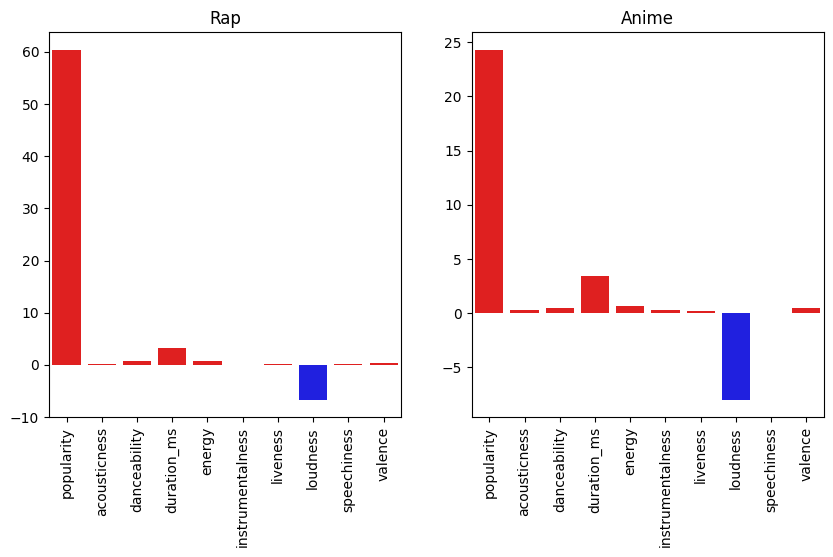

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new = df.drop('instance_id', axis=1) # Тут надо создать новый df для того, чтобы можно было спокойно удалять строчки и прочие приколы без боязни навредить другим программам
df_new.loc[:, 'duration_ms'] = df['duration_ms'] / 60000 # То же самое, что с предыдущей строчкой, поэтому привел это к минутам

df_mean = df_new.groupby("music_genre").mean(numeric_only=True).sort_values(by="popularity", ascending=False)
top_genre = df_mean.iloc[0]
nn_genre = df_mean.iloc[-1]

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x=top_genre.index, y=top_genre, ax=axes[0], palette=["blue" if val < 0 else "red" for val in top_genre.values])
sns.barplot(x=nn_genre.index, y=nn_genre, ax=axes[1], palette=["blue" if val < 0 else "red" for val in nn_genre.values])
plt.setp(axes, xticks=range(len(df_mean.columns)), xticklabels=df_mean.columns, ylabel="")
axes[0].set_title(top_genre.name)
axes[1].set_title(nn_genre.name)
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]